In [1]:
import pandas as pd


path_311 = "data/311_Service_Requests_from_2010_to_Present.csv"
path_311 = "/Volumes/Szalata_Art/311_Service_Requests_from_2010_to_Present.csv"
path_nta = "data/Neighborhood Tabulation Areas.geojson"
path_nta_population = "data/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv"

In [2]:
df_311 = pd.read_csv(path_311)

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,17,20,31,32,33,34,35,36,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [8]:
df_311["Unique Key"].is_unique

True

In [9]:
df_311.set_index("Unique Key");

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32438412,01/17/2016 10:12:35 PM,01/17/2016 11:14:02 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10468,2386 DAVIDSON AVENUE,DAVIDSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.861404,-73.903217,"(40.861403787976336, -73.90321733819738)"
32438413,01/17/2016 03:23:56 PM,01/17/2016 07:28:40 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10032,551 WEST 170 STREET,WEST 170 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.841828,-73.937822,"(40.84182769447864, -73.9378223173734)"
32438414,01/17/2016 07:04:42 PM,01/19/2016 08:49:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11103,30-50 44 STREET,44 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.761218,-73.912766,"(40.76121803522642, -73.91276636314252)"
32438415,01/17/2016 06:46:31 PM,01/17/2016 07:51:41 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11203,3820 CHURCH AVENUE,CHURCH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651177,-73.941618,"(40.65117670975687, -73.94161822813875)"
32438416,01/18/2016 12:02:23 AM,01/18/2016 04:51:22 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226,1050 OCEAN AVENUE,OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636969,-73.958533,"(40.63696881031932, -73.9585325476236)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32438407,01/17/2016 10:24:59 PM,01/18/2016 12:15:18 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11418,91-46 LEFFERTS BOULEVARD,LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695032,-73.828497,"(40.69503229944278, -73.8284970250893)"
32438408,01/17/2016 10:53:07 PM,01/18/2016 12:19:40 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11216,1332 ATLANTIC AVENUE,ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678394,-73.948271,"(40.67839437500858, -73.94827138767992)"
32438409,01/17/2016 04:55:01 PM,01/17/2016 06:20:35 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11435,144-27 JAMAICA AVENUE,JAMAICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702116,-73.810623,"(40.70211598279333, -73.81062265312119)"


In [149]:
df_311_dropped_without_location = df_311.drop(df_311[df_311["Location"].isna()][df_311["Complaint Type"].isin(incorrect_complaints.values.flatten())].index)

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [153]:
df_311_dropped_without_location[df_311_dropped_without_location["Location"].isna()].groupby("Complaint Type").count()["Unique Key"].sort_values()[-20:]

Complaint Type
Housing Options                               18080
Water System                                  19433
DOF Property - Update Account                 21605
DCA / DOH New License Application Request     26243
DHS Advantage -Landlord/Broker                30695
DHS Advantage - Tenant                        40930
DOF Property - Payment Issue                  42306
Housing - Low Income Senior                   51517
HPD Literature Request                        52831
Street Condition                              59336
DOF Property - Request Copy                   61187
DOF Property - Owner Issue                    63830
DOF Parking - Payment Issue                   72491
Maintenance or Facility                       77584
SCRIE                                         87627
DOF Property - Reduction Issue               108468
Benefit Card Replacement                     113956
General Construction/Plumbing                165812
Traffic Signal Condition                     1822

In [95]:
df_311[df_311["Location"].isna()][["Complaint Type","Incident Address", "Incident Zip", "Street Name", "Cross Street 1", "Cross Street 2", "Intersection Street 1"]]

,Complaint Type,Incident Address,Incident Zip,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1
2027688,Sewer,143 STREET,11435,143 STREET,ARCHER AVENUE,94 AVENUE,NaN
5778168,Traffic Signal Condition,NaN,NaN,NaN,NaN,NaN,OCEAN PKWY
5877833,Standing Water,FULTON ST FULTON ST &amp; GREEN AVE,11238,FULTON ST &amp; GREEN AVE,NaN,NaN,NaN
7913404,Taxi Licensee Complaint,NaN,NaN,NaN,NaN,NaN,NaN
7977282,Street Light Condition,175-054 GRAND CENTRAL PKWY,11432,GRAND CENTRAL PKWY,HOME LAWN ST,HOME LAWN STREET,NaN
...,...,...,...,...,...,...,...
10998555,SCRIE,NaN,11372,NaN,NaN,NaN,NaN
10998556,Street Light Condition,NaN,NaN,NaN,HORACE HARDING EXPY,KISSENA BLVD,HORACE HARDING EXPY
10998557,Street Light Condition,79 ST,NaN,79 ST,GRAND CENTRAL PKWY,SEE COMMENTS FOR CROSS ST,NaN
10998558,Street Light Condition,NaN,NaN,NaN,NaN,NaN,RAILROAD ST N


In [107]:
df_311_dropped_without_location.to_csv("/Volumes/Szalata_Art/311_Service_Requests_from_2010_to_Present_without115.csv");

dtype('float64')

In [157]:
df_311_dropped_without_location = df_311_dropped_without_location.drop(columns=["X Coordinate (State Plane)", "Y Coordinate (State Plane)"]).set_index("Unique Key")

In [182]:
df_311_dropped_without_location.drop(columns="Location", inplace=True)

In [184]:
df_311_dropped_without_location.to_csv("/Volumes/Szalata_Art/311_Service_Requests_from_2010_to_Present_cleaned.csv");

# After dropping Location and X/Y Coordinates in State Plane 

In [2]:
import pandas as pd

In [5]:
updated_path = "/Volumes/Szalata_Art/311_Service_Requests_from_2010_to_Present_cleaned.csv"
df_311 = pd.read_csv(updated_path)

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,17,20,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude'],
      dtype='object')

In [12]:
hw_segment_present = df_311[~df_311["Bridge Highway Segment"].isna()]

In [14]:
hw_segment_present["Complaint Type"].unique()

array(['Highway Condition', 'Bridge Condition', 'Traffic',
       'Taxi Complaint', 'Derelict Vehicle', 'Homeless Encampment',
       'For Hire Vehicle Complaint', 'Taxi Report',
       'For Hire Vehicle Report', 'Highway Sign - Missing',
       'Highway Sign - Damaged', 'Abandoned Vehicle',
       'Highway Sign - Dangling', 'Forms', 'Comments', 'Question',
       'Research Questions', 'Homeless Person Assistance',
       '../../../../../../../../../...', 'file:///etc/passwd',
       '..\\..\\..\\..\\..\\..\\..\\..\\..\\...',
       'Misc. Comments../../../../....',
       'Misc. Comments..\\..\\..\\..\\....', 'General Question',
       'Select Message Type...', 'Traffic/Illegal Parking'], dtype=object)

In [20]:
invalid_complaints = ['../../../../../../../../../...',
       'file:///etc/passwd', '..\\..\\..\\..\\..\\..\\..\\..\\..\\...',
       'Misc. Comments../../../../....',
       'Misc. Comments..\\..\\..\\..\\....', 'Select Message Type...']
df_311_dropped = df_311[~df_311["Complaint Type"].isin(invalid_complaints)]

In [22]:
df_311 = df_311_dropped

In [23]:
df_311.count()

Unique Key                        21741769
Created Date                      21741769
Closed Date                       21124030
Agency                            21741769
Agency Name                       21741769
Complaint Type                    21741769
Descriptor                        21499729
Location Type                     16324933
Incident Zip                      20454069
Incident Address                  17584604
Street Name                       17583227
Cross Street 1                    14567915
Cross Street 2                    14489354
Intersection Street 1              3721567
Intersection Street 2              3714098
Address Type                      20467101
City                              20414255
Landmark                            410577
Facility Type                      5500657
Status                            21741769
Due Date                           8525383
Resolution Description            20662078
Resolution Action Updated Date    21376477
Community B

In [27]:
unique_dates = df_311["Created Date"].unique()

In [72]:
unique_closed_dates = df_311["Closed Date"].unique()

AttributeError: 'float' object has no attribute 'split'

In [78]:
unique_closed_dates = list(pd.DataFrame(unique_closed_dates)[0].dropna())

In [249]:
import re

txt='01/17/2026 10:12:35 PM'

re1='((?:[0]?[1-9]|[1][012])[-:\\/.](?:(?:[0-2]?\\d{1})|(?:[3][01]{1}))[-:\\/.](?:(?:[1]{1}\\d{1}\\d{1}\\d{1})|(?:[2]{1}\\d{3})))(?![\\d])'	# MMDDYYYY 1
re2='( )'	# White Space 1
re3='((?:(?:[0-1][0-9])|(?:[2][0-3])|(?:[0-9])):(?:[0-5][0-9])(?::[0-5][0-9])?(?:\\s?(?:am|AM|pm|PM))?)'	# HourMinuteSec 1

rg = re.compile(re1+re2+re3,re.IGNORECASE|re.DOTALL)

def try_matching(txt):
    m = rg.search(str(txt))
    if not m:
        print("NOT A MATCH!")
        print(txt)
        return 1
    return 0
#     mmddyyyy1=m.group(1)
#     ws1=m.group(2)
#     time1=m.group(3)
#     print("("+mmddyyyy1+")"+"("+ws1+")"+"("+time1+")"+"\n")

In [68]:
mapped = list(map(lambda x: try_matching(x), unique_dates))

In [71]:
sum(mapped)

0

In [82]:
mapped_closed = list(map(lambda x: try_matching(x), unique_closed_dates))
sum(mapped_closed)

NOT A MATCH!
03/30/3027 12:00:00 AM


1

There is one date that is impossible. Dropping it.

In [83]:
df_311 = df_311[df_311["Closed Date"] != "03/30/3027 12:00:00 AM"]

In [98]:
df_311["Created Date"] = pd.to_datetime(df_311["Created Date"])

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
df_311["Closed Date"] = pd.to_datetime(df_311["Closed Date"])

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


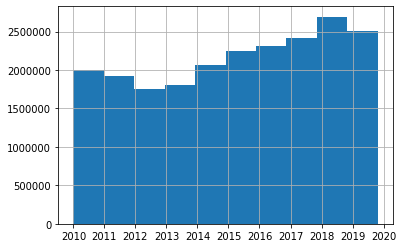

In [103]:
df_311["Created Date"].hist()

In [114]:
import datetime
df_311 = df_311[df_311["Closed Date"] < datetime.datetime(2019, 11, 17)]

In [113]:
df_311.set_index("Unique Key")

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
Unique Key,,,,,,,,,,,,,,,,,,,,,
32438412,2016-01-17 22:12:35,2016-01-17 23:14:02,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10468,2386 DAVIDSON AVENUE,DAVIDSON AVENUE,...,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.861404,-73.903217
32438413,2016-01-17 15:23:56,2016-01-17 19:28:40,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10032,551 WEST 170 STREET,WEST 170 STREET,...,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.841828,-73.937822
32438414,2016-01-17 19:04:42,2016-01-19 08:49:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11103,30-50 44 STREET,44 STREET,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.761218,-73.912766
32438415,2016-01-17 18:46:31,2016-01-17 19:51:41,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11203,3820 CHURCH AVENUE,CHURCH AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651177,-73.941618
32438416,2016-01-18 00:02:23,2016-01-18 16:51:22,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226,1050 OCEAN AVENUE,OCEAN AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636969,-73.958533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32438407,2016-01-17 22:24:59,2016-01-18 00:15:18,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11418,91-46 LEFFERTS BOULEVARD,LEFFERTS BOULEVARD,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695032,-73.828497
32438408,2016-01-17 22:53:07,2016-01-18 00:19:40,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11216,1332 ATLANTIC AVENUE,ATLANTIC AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678394,-73.948271
32438409,2016-01-17 16:55:01,2016-01-17 18:20:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11435,144-27 JAMAICA AVENUE,JAMAICA AVENUE,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702116,-73.810623


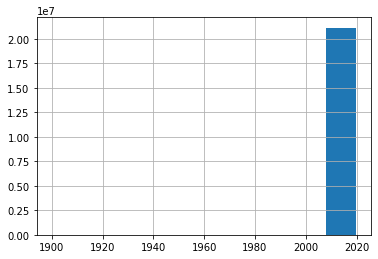

In [115]:
df_311["Closed Date"].hist()

In [121]:
df_311[df_311["Closed Date"] < datetime.datetime(2009, 1, 1)]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
333468,32888339,2016-03-13 00:53:20,1900-01-01,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11235,4701 BEDFORD AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.587197,-73.944212
333501,32888373,2016-03-13 01:03:59,1900-01-01,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11235,2401 EAST 16 STREET,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592123,-73.954175
335107,32890181,2016-03-13 00:52:52,1900-01-01,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11235,4659 BEDFORD AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.587933,-73.944352
335787,32890951,2016-03-13 01:04:46,1900-01-01,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11235,2568 EAST 23 STREET,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589600,-73.946616
336585,32891860,2016-03-13 01:00:58,1900-01-01,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11235,3030 OCEAN AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.587246,-73.949116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21525341,32163591,2015-12-10 12:06:52,1900-01-01,DFTA,Department for the Aging,Senior Center Complaint,NaN,Senior Center,10029,312 EAST 109 STREET,...,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.792306,-73.940480
21525403,32163691,2015-12-10 12:17:08,1900-01-01,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,11433,173-61 103 ROAD,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704084,-73.784043
21525467,32163807,2015-12-10 12:53:58,1900-01-01,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Building,Street,11426,88-10 247 STREET,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.728953,-73.720869
21580426,32235994,2015-12-20 00:47:47,1900-01-01,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10038,NaN,...,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707388,-74.005482


In [126]:
df_updated = df_311[(df_311["Closed Date"] > datetime.datetime(2009, 1, 1)) | (df_311["Closed Date"] == datetime.datetime(1900, 1, 1))]

In [136]:
import numpy as np
df_updated[df_updated["Closed Date"] == datetime.datetime(1900, 1, 1)]["Closed Date"].replace(datetime.datetime(1900, 1, 1), np.NaN, inplace=True)

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [138]:
df_updated["Closed Date"] = df_updated["Closed Date"].replace(datetime.datetime(1900, 1, 1), np.NaN)

/usr/local/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


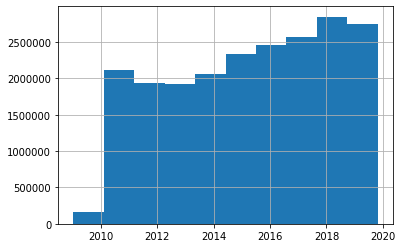

In [140]:
df_updated["Closed Date"].hist()

In [141]:
df_311 = df_updated

In [143]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude'],
      dtype='object')

In [156]:
grouped_311 = df_311.groupby("Complaint Type")

In [158]:
counted = grouped_311.count()

In [179]:
counted[(counted["Unique Key"] < 1000)]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
Complaint Type,,,,,,,,,,,,,,,,,,,,,
AGENCY,8,8,8,8,8,8,8,8,8,8,...,8,0,0,0,0,0,0,0,8,8
ATF,434,434,434,434,434,0,0,373,355,355,...,434,0,0,0,0,0,0,0,373,373
Adopt-A-Basket,570,570,570,570,570,570,570,553,433,433,...,570,0,0,0,0,0,0,0,551,551
Advocate - Levy,2,2,2,2,2,2,2,2,2,2,...,2,0,0,0,0,0,0,0,2,2
Advocate - Lien,13,13,13,13,13,13,13,13,13,13,...,13,0,0,0,0,0,0,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VACANT APARTMENT,3,3,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,0,0,3,3
Window Guard,10,10,0,10,10,10,1,10,10,10,...,10,0,0,0,0,0,0,0,10,10
X-Ray Machine/Equipment,102,102,102,102,102,102,102,102,102,102,...,102,0,0,0,0,0,0,0,102,102


In [183]:
df_311["Agency"] = df_311["Agency"].astype("category")

In [185]:
df_311["Agency Name"] = df_311["Agency Name"].astype("category")

In [188]:
df_311["Complaint Type"] = df_311["Complaint Type"].astype("category")

In [189]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude'],
      dtype='object')

In [193]:
df_311["Descriptor"] = df_311["Descriptor"].astype("category")

In [196]:
df_311["Location Type"] = df_311["Location Type"].astype("category")

In [200]:
df_311["Incident Zip"] = pd.to_numeric(df_311["Incident Zip"], errors="coerce")

In [207]:
df_311.loc[df_311["Incident Zip"].notnull(), "Incident Zip"] = df_311.loc[df_311["Incident Zip"].notnull(), "Incident Zip"].apply(int)

In [211]:
len(df_311["Incident Address"].unique())

1401553

In [214]:
df_311["Address Type"] = df_311["Address Type"].astype("category")

In [217]:
df_311["City"] = df_311["City"].astype("category")

In [220]:
df_311["Landmark"] = df_311["Landmark"].astype("category")

In [222]:
df_311["Facility Type"] = df_311["Facility Type"].astype("category")

In [224]:
df_311["Status"] = df_311["Status"].astype("category")

In [228]:
df_311["Due Date"] = pd.to_datetime(df_311["Due Date"])

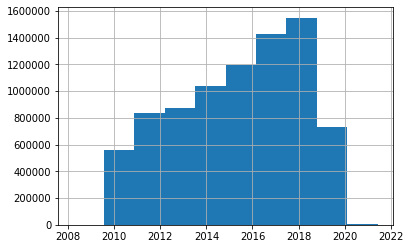

In [235]:
df_311["Due Date"].hist()

In [234]:
 df_311["Due Date"] = df_311["Due Date"].replace(datetime.datetime(1900, 1, 2), np.NaN)

In [237]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude'],
      dtype='object')

In [242]:
df_311["Resolution Description"] = df_311["Resolution Description"].astype("category")

In [262]:
df_311["Resolution Action Updated Date"] = pd.to_datetime(df_311["Resolution Action Updated Date"])

In [263]:
df_311["Resolution Action Updated Date"] = df_311["Resolution Action Updated Date"].replace(datetime.datetime(1900, 1, 2), np.NaN)

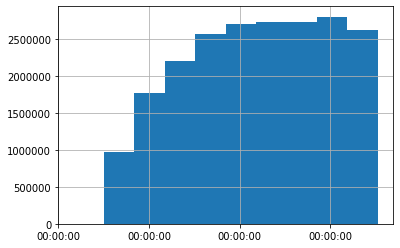

In [264]:
df_311["Resolution Action Updated Date"].hist()

In [247]:
df_311["Resolution Action Updated Date"].head()

0    01/17/2016 11:14:02 PM
1    01/17/2016 07:28:40 PM
2    01/19/2016 08:49:00 AM
3    01/17/2016 07:51:04 PM
4    01/18/2016 04:51:22 PM
Name: Resolution Action Updated Date, dtype: object

In [251]:
unique_action = df_311["Resolution Action Updated Date"].unique()

In [252]:
unique_action

array(['01/17/2016 11:14:02 PM', '01/17/2016 07:28:40 PM',
       '01/19/2016 08:49:00 AM', ..., '01/18/2016 12:19:40 AM',
       '01/17/2016 06:20:35 PM', '01/18/2016 02:56:51 AM'], dtype=object)

In [253]:
list(map(lambda x: try_matching(x), unique_action))

NOT A MATCH!
nan


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [254]:
df_311["Resolution Action Updated Date"] = df_311["Resolution Action Updated Date"].replace("nan", np.NaN)

In [ ]:
df_311 = df_311[df_311["Closed Date"] != "03/30/3027 12:00:00 AM"]

In [261]:
df_311["Resolution Action Updated Date"] = df_311[df_311["Resolution Action Updated Date"] != "10/30/2926 11:51:00 AM"]

In [267]:
df_311["Resolution Action Updated Date"].unique()

array(['1970-01-01T00:00:00.032438412', '1970-01-01T00:00:00.032438413',
       '1970-01-01T00:00:00.032438414', ...,
       '1970-01-01T00:00:00.032438409', '1970-01-01T00:00:00.032438410',
       '1970-01-01T00:00:00.032438411'], dtype='datetime64[ns]')

In [273]:
df_311.to_pickle("/Volumes/Szalata_Art/311_Service_Requests_from_2010_to_Present_small.pkl")

     |████████████████████████████████| 36.6MB 1.4MB/s eta 0:00:01
